# Principles of Data Science

### Lecture 11: More Maximum Likelihood Estimation

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## More MLE

- In today's lecture we will continue our discussion of maximum likelihood estimation (MLE)

- Learning objectives:
    - Understand and be able to code many parameter likelihoods
    - Recognise the use case and be able to deploy extended likelihood fits
    - Understand and be able to implement binned ML estimates

## Recap

- In the previous lecture we revisited the concept of the likelihood

$$ L(\vec{\theta}) = \prod_i^N f(X_i; \vec{\theta}) $$

- Saw that parameter estimates can be obtained by maximising the likelihood

- Saw the variances on parameter estimates can be obtained from:
    - The inverse double differential of the log-likelihood
    - The profile likelihood contours
    
- Discussed the score

$$ S(\theta) = \frac{\partial \ln L}{\partial \theta} $$

- Discussed the information (the variance of the score)

$$ I(\theta) = V(S(\theta)) = E[S(\theta)^2] = - E\left[ \frac{\partial^2 \ln L}{\partial \theta ^2} \right] $$




## Many parameter likelihoods

- The ML method works for many parameters at the same time
- Recall likelihood from previous lecture

<img src="plots/likelihood2.png" alt="drawing" width="400">

- As $N\to\infty$ estimates distributed as a multi-variate normal 

- The covariance of the estimates generalises to

$$ \text{cov}(\theta_i, \theta_j) = -E \left[ \frac{\partial ^2 \ln L}{\partial \theta_i \partial \theta_j} \right] ^{-1} = - \left( \left. \frac{\partial^2 \ln L}{\partial \theta_i \partial \theta_j} \right|_{\vec{\theta}=\hat{\vec{\theta}}}\right)^{-1} $$

- For large $N\to\infty$ the ML estimate produces:
    - normally distributed estimate for $\hat{\theta}$
    - which is unbiased
    - is distributed about the true value
    - has variance equal to the minimum variance bound
    
- Thus for large samples ML is the "<font color="red">best</font>" estimator
    - it is <font color="blue">*unbiased*</font>, <font color="blue">*consistent*</font> and <font color="blue">*efficient*</font>
    
- Not necessarily the case for small $N$ and other niche cases

## An example ML fit using `iminuit`

- My favoured package for ML estimation (and for fitting in general) is the `iminuit` package
- It will build the likelihood for us using inbuilt `cost` functions
- Provides estimates of uncertainty as well

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

## Generate some normally distributed data
true_mu = 1
true_sg = 3
N = 1000 
x = np.random.normal(true_mu, true_sg, size=N)

In [3]:
## define a fit model
from scipy.stats import norm
def model(x, mu, sg):
    return norm.pdf(x, mu, sg) 

In [4]:
## define the function we want to minimize
## can use iminuits built in cost for this
## which will define the negative log likelihood
from iminuit.cost import UnbinnedNLL
nll = UnbinnedNLL(x, model)

In [5]:
## now construct the iminuit minimizer
## which **requires** starting values
from iminuit import Minuit
mi = Minuit(nll, mu=0, sg=2)

In [6]:
## run minimisation routine called `migrad`
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5047                       │              Nfcn = 54               │
│ EDM = 9.8e-10 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   1.14    │   0.10    │            │            │         │         │       │
│ 1 │ sg   │   3.02    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │  0.0091   5e-06 │
│ sg │   5e-06 0.00455 │
└────┴─────────────────┘

In [7]:
## run the `hesse` algorithm which does a more accurate computation of the second derivatives
## for the covariance matrix
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5047                       │              Nfcn = 64               │
│ EDM = 9.79e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   1.14    │   0.10    │            │            │         │         │       │
│ 1 │ sg   │   3.02    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │   0.0091 1.01e-06 │
│ sg │ 1.01e-06  0.00455 │
└────┴───────────────────┘

- Notice the nice output display we get when running in a notebook
- You can print this to the screen in normal code using `print(mi)`
- Let's talk through these different outputs

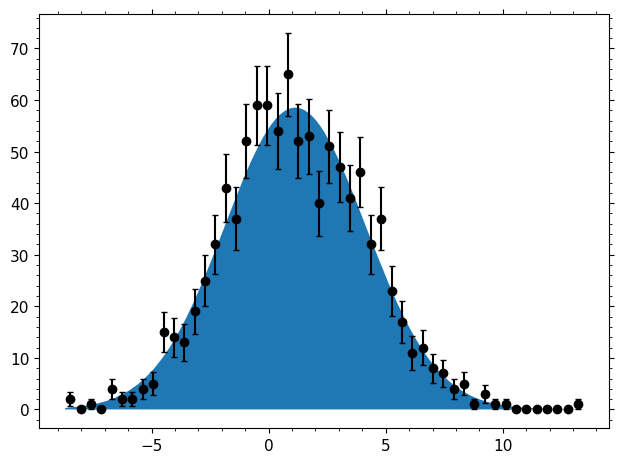

In [8]:
## visualise the fit result using `iminuits` built in method
mi.visualize()

- we can also make our own plots of course 

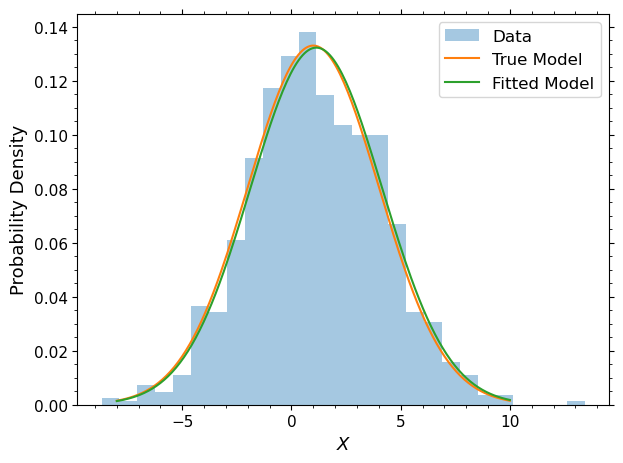

In [9]:
plt.hist(x, bins='auto', density=True, alpha=0.4, label='Data')
xp = np.linspace(-8,10,200)
plt.plot(xp, model(xp, true_mu, true_sg), label='True Model')
plt.plot(xp, model(xp, *mi.values), label='Fitted Model')
plt.xlabel('$X$') 
plt.ylabel('Probability Density')
plt.legend()

## Profiling / scanning the likelihood

- For a 2D likelihood (like in the example above) we can actually draw the entire likelihood


In [10]:
## define our own nll function so we can draw it
def nlnL(mu, sg):
    return -np.sum( norm.logpdf(x, mu, sg) )

vec_nlnL = np.vectorize( nlnL ) 

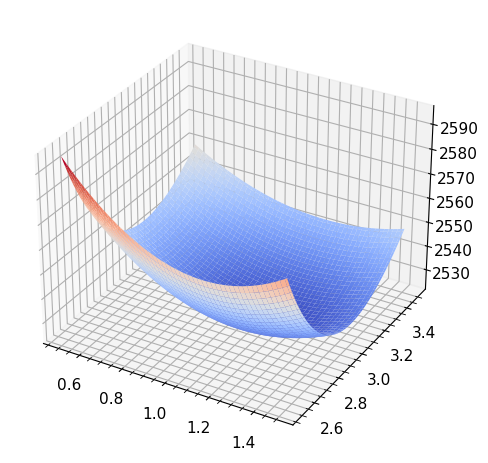

In [11]:
# plot as surface
fig, ax = plt.subplots( subplot_kw={'projection':'3d'} )
mu = np.linspace(0.5,1.5,100)
sg = np.linspace(2.5,3.5,100)
mug, sgg = np.meshgrid(mu,sg)
ax.plot_surface(mug, sgg, vec_nlnL(mug,sgg), cmap='coolwarm' )

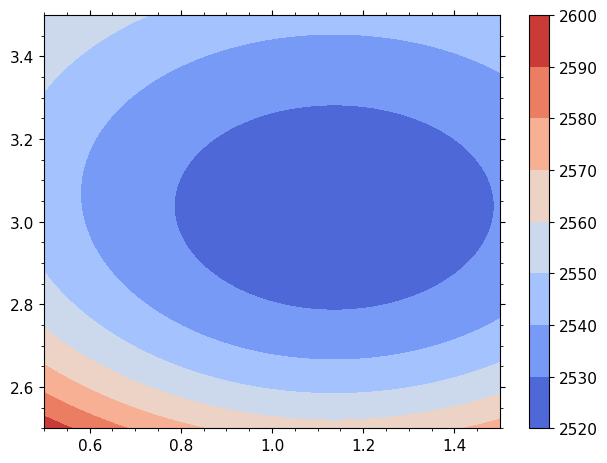

In [12]:
# plot as contour
im = plt.contourf( mug, sgg, vec_nlnL(mug,sgg), cmap='coolwarm')
plt.colorbar(im)

## The profiled log-likelihood

- We can draw likelihoods in one dimension by "profiling" over other variables
- This is not the same as slicing
- This means that for every point in the 1D scan we find the best fit values over all other dimensions (this is what profiling means)
- Below I will show a specific example using `iminuit`
- Then I will use the built in methods of `iminuit` to compute this quickly and efficiently


In [13]:
## scan the 1D likelihood in mu by hand
nlls = []
for mval in mu:
    # set the minuit value of mu to the scan value
    mi.values['mu'] = mval
    # now fix this parameter in the minimisation (so it will not be "floated")
    mi.fixed['mu'] = True
    # run the minimisation again
    mi.migrad()
    # save the resulting nll value
    nlls.append( mi.fval )

print(mi)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5061                       │              Nfcn = 671              │
│ EDM = 1.77e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

Text(0, 0.5, '$-2NLL$')

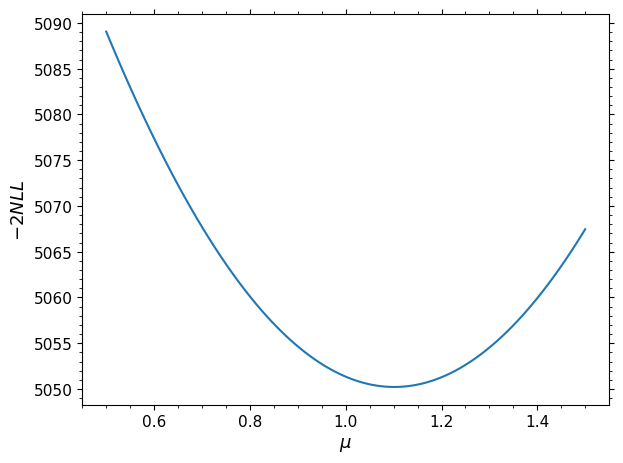

In [13]:
plt.plot(mu, nlls)
plt.xlabel('$\mu$')
plt.ylabel('$-2NLL$') 

## Properties of the profiled likelihood

- There is a very nice property of the profiled likelihood
- It allows us to read off the uncertainty on the estimate in an accurate way
    - without having to worry about numerical instabilities of the `hesse` calculation
- The reason that the values below take the values they do will become clear later
- For now just recall that to read off the uncertainties of a profiled log-likelihood then
    - $1\sigma$ error where $-\Delta \ln L = 0.5$
    - $2\sigma$ error where $-\Delta \ln L = 2 $
    - $3\sigma$ error where $-\Delta \ln L = 4.5$
    - $n\sigma$ error where $-\Delta \ln L = n^2/2$
    
- `iminuit` has a built in routine for this called `minos` 
    - allows for **asymmetric errors** (estimate distributed as bifurcated Gaussian)
    
- For reasons that will also become clear later, `iminuit` constructs the cost function as $-2\ln L$

## iminuit example of profiling the likelihood

In [14]:
# release previously fixed parameter
mi.fixed['mu']=False

In [15]:
# re-run the minimisation
mi.migrad()

# run the minos error routine
mi.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5050                       │              Nfcn = 738              │
│ EDM = 3.13e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    1.1    │    0.1    │    -0.1    │    0.1     │         │         │       │
│ 1 │ sg   │   3.02    │   0.07    │   -0.07    │    0.07    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │          sg           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.1    │    0.1    │   -0.07   │   0.07    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │ 0.00914   5e-06 │
│ sg │   5e-06 0.00457 │
└────┴─────────────────┘

- and can get `iminuit` to give us minos scan values

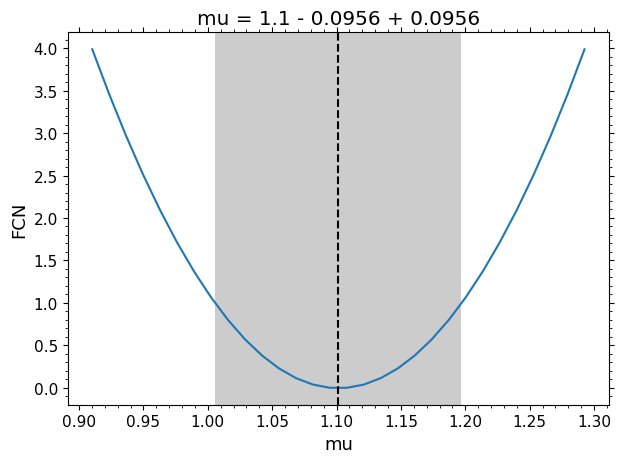

In [16]:
_ = mi.draw_mnprofile('mu')

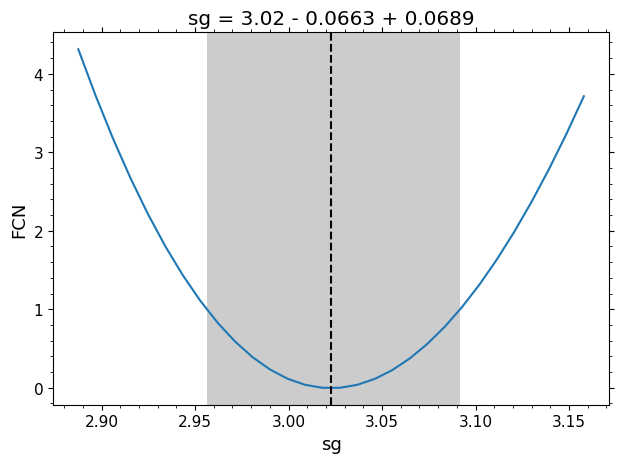

In [17]:
_ = mi.draw_mnprofile('sg')

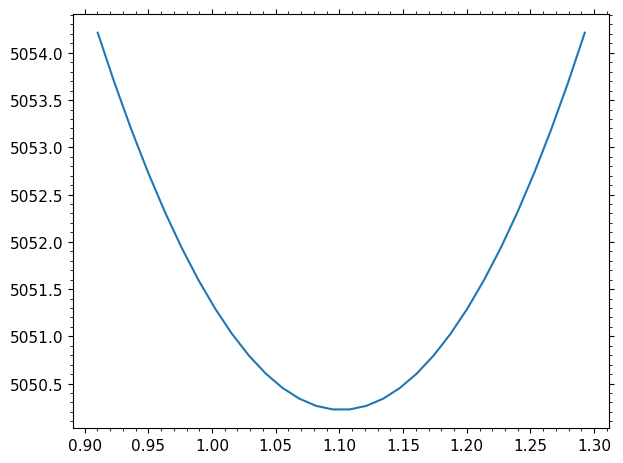

In [18]:
mu, n2ll, valid = mi.mnprofile('mu')
plt.plot(mu[valid], n2ll[valid]) 

# <font color="darkred">*Musical interlude...*</font>

## Likelihood profiles in 2D

- We can use the same "profiling" method to reduce to any number of dimensions
- Clearly 1D is useful for quoting uncertainties
- 2D is also very useful for visualising and seeing correlations

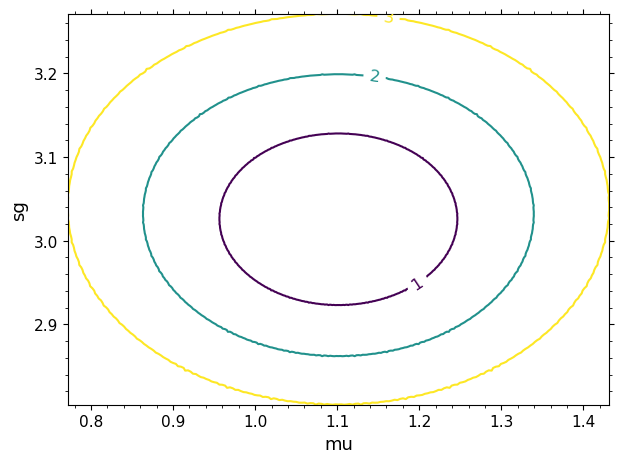

In [19]:
# use iminuits built in contour drawer
mi.draw_mncontour('mu','sg', cl=[1,2,3], size=500) 

In [20]:
# or if we rather plot it ourselves
# note this produces x,y coords of the actual contours
# not a 2D scan
contours = np.array( [ mi.mncontour('mu','sg', cl=cl, size=1000, interpolated=True) for cl in [1,2,3] ] )
print(contours.shape)

(3, 1001, 2)


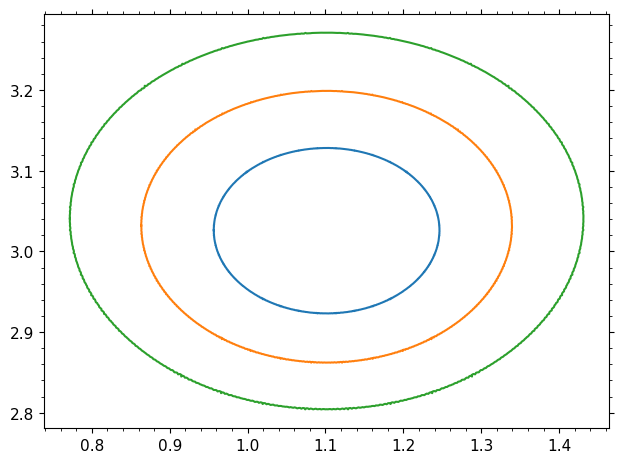

In [21]:
for c in [0,1,2]:
    plt.plot(*contours[c].T)

(2.7523980988414127, 3.2931249475972715)

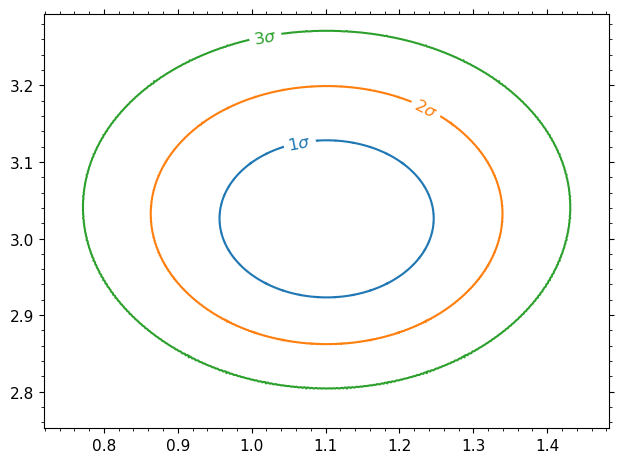

In [22]:
# plot with pretty labels using mpl ContourSet
from matplotlib.contour import ContourSet
fig, ax = plt.subplots()
contours = [ [ mi.mncontour('mu','sg', cl=cl, size=1000, interpolated=True) ] for cl in [1,2,3] ] 
cs = ContourSet(ax, [1,2,3], contours, colors=['C0','C1','C2'])
ax.clabel(cs, fmt=lambda x: f'${x}\sigma$') 

xlim = (mi.values['mu'] - 4*mi.errors['mu'], mi.values['mu'] + 4*mi.errors['mu'])
ylim = (mi.values['sg'] - 4*mi.errors['sg'], mi.values['sg'] + 4*mi.errors['sg']) 

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

## What if we want to plot the actual grid of points?
 - This has to be done by hand by fixing the relevent values and re-running the minimisation
 - In this simple example our likelihood is only 2D anyway 
     - so it is the full likelihood
     - but shows the principle of profiling in 2D
     

In [23]:
mi.migrad()
mu_bf = mi.values['mu']
sg_bf = mi.values['sg']
nll_bf = mi.fmin

mu = np.linspace(*xlim,50)
sg = np.linspace(*ylim,50)

mu, sg = np.meshgrid(mu,sg)


nll = []

for mupt, sgpt in zip( mu.flatten(), sg.flatten() ):
    mi.values['mu'] = mupt
    mi.values['sg'] = sgpt
    mi.fixed['mu'] = True
    mi.fixed['sg'] = True
    mi.migrad()
    nll.append( mi.fval )
    
nll = np.array(nll).reshape(mu.shape)

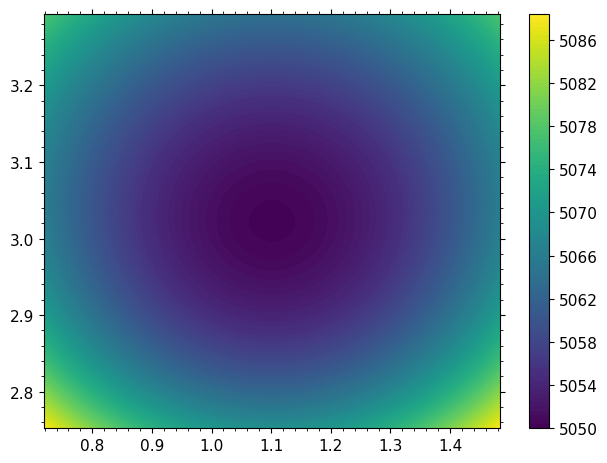

In [24]:
im = plt.contourf( mu, sg, nll, levels=100 )
plt.colorbar(im) 

## A comment on conversions of significances and $p$-values
- Will come back to this in later lectures
- The key question to answer is once I draw $-2\Delta \ln L$ how do I draw the contours containing $X\%$ or some $Z$-score?
- But for that we need to understand something about least squares fit and Wilks' theorem (which will come in the next lecture)

## The extended maximum likelihood

- The ML method above assumes that the total p.d.f. is normalised
- So that for $N$ i.i.d observations $X_i$ with $X \sim f(X; \vec{\theta})$ 

$$ \int f(X; \vec{\theta}) dX = 1 $$

- With the likelihood given by

$$ L(\vec{\theta}) = \prod_{i=1}^N f(X_i; \vec{\theta}) $$

- $N$ is itself a r.v. 
    - sometimes we want to estimate its true value
    - determine not just the *shape* of the p.d.f but also its overall *yield* or *scale*
    
- $N$ is an event count so is <font color="blue">Poisson distributed</font>
    - Thus *extend* our likelihood to include this flexibility
    - This is called the *extended maximum likelihood* (EML)

- The extended maximum likelihood term:
    - $N \sim \text{Poiss}(N; \nu)$
    
    
- EML becomes

$$ L(\nu, \vec{\theta}) = \frac{\nu^N e^{-\nu}}{N!} \prod_{i=1}^N f(X_i; \vec{\theta}) $$

- Notice that $\ln L$ is simply

$$ \ln L(\nu, \vec{\theta}) = N\ln \nu - \nu - \ln(N!) + \sum_{i=1}^N \ln f(X_i; \vec{\theta} )$$

- and for a $\Delta \ln L$ the $N!$ term drops out

## An EML example using `iminuit`

- `iminuit` also has a built in cost function for EML fits: `iminuit.cost.ExtendedUnbinnedNLL`

In [15]:
import numpy as np

# generate some Gaussian distributed data 
# with a poisson random number of events 

N = np.random.poisson(1000)
dset = np.random.normal(0, 1, size=N)

# construct a model to fit
from scipy.stats import norm 

def model(x, mu, sg):
    return norm.pdf(x, mu, sg) 

# iminuit wants the density to return the number N as well as the number times the shape
# so it can compute both the normal ML term and the extended term
def density(x, N, mu, sg):
    return N, N*norm.pdf(x,mu,sg)

from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL

# make the cost function, in this case the 
# negative log likelihood
nll = ExtendedUnbinnedNLL(dset, density)

# construct the minimisation object which # needs to be passed starting values
mi = Minuit(nll, N=1000, mu=0, sg=1)

# minimise it
mi.migrad()

# run the "Hesse" algorithm to compute the
# covariance matrix (from inverse second derivs) 
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -8608                      │              Nfcn = 61               │
│ EDM = 1.61e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │    968    │    31     │            │            │         │         │       │
│ 1 │ mu   │  -0.019   │   0.033   │            │            │         │         │       │
│ 2 │ sg   │   1.010   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │         N        mu        sg │
├────┼───────────────────────────────┤
│  N │       968 -1.12e-08  3.96e-08 │
│ mu │ -1.12e-08   0.00105  1.48e-07 │
│ sg │  3.96e-08  1.48e-07  0.000527 │
└────┴───────────────────────────────┘

968


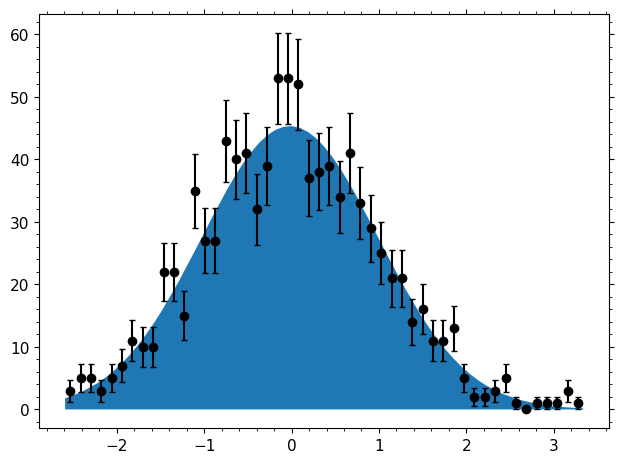

In [18]:
mi.visualize()

print(len(dset))

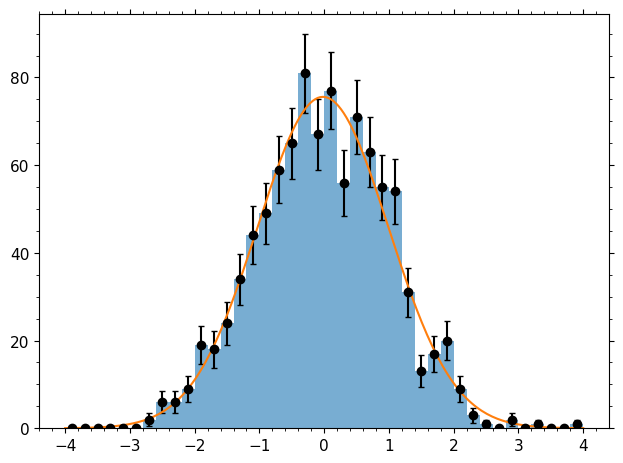

In [27]:
# plot the fit result
nh, xe, _ = plt.hist(dset, bins=40, range=(-4,4), alpha=0.6, label='Dataset')
cx = 0.5*(xe[1:]+xe[:-1])
plt.errorbar( cx, nh, nh**0.5, fmt='ko' )

# need to track the bin width to get the normalisation right
bw = xe[1]-xe[0]
x = np.linspace(-4,4,200)
plt.plot( x, density(x, *mi.values)[1]*bw, label='Fitted Model')

# End of Lecture 11

By the end of this lecture you should:
   - Understand and be able to code many parameter likelihoods
   - Recognise the use case and be able to deploy extended likelihood fits
   - Understand and be able to implement binned ML estimates